# Prediction using Unsupervised ML

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns


In [29]:
data_path = '/Users/pranjali_yadav/Desktop/GRIP/Iris.csv'
data = pd.read_csv(data_path)

In [30]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
data = data.drop(columns=['Id'])

In [34]:
X = data.iloc[:, :-1].values

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### elbow method in Kmeans to find optimal no of k value

In [36]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


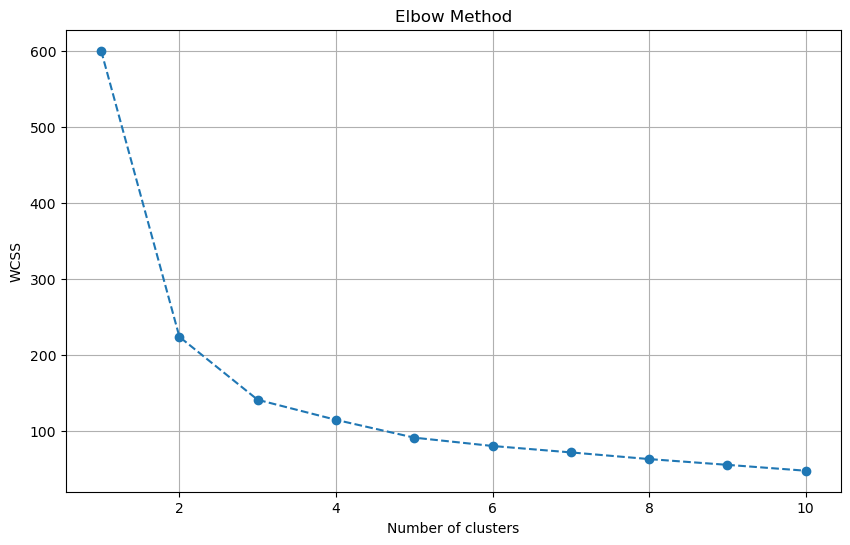

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [38]:
silhouette_avg = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.predict(X_scaled)
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))


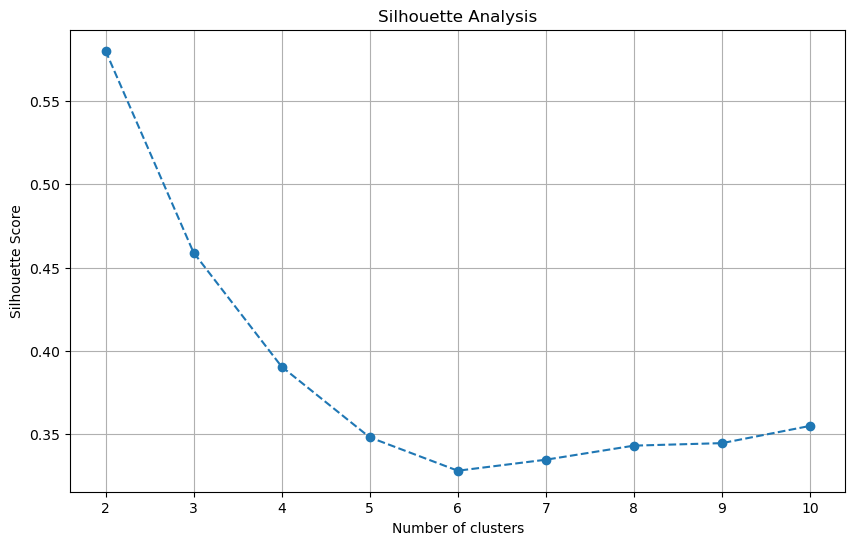

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_avg, marker='o', linestyle='--')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [40]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

In [41]:
data['Cluster'] = y_kmeans #adding the cluster to dataset

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


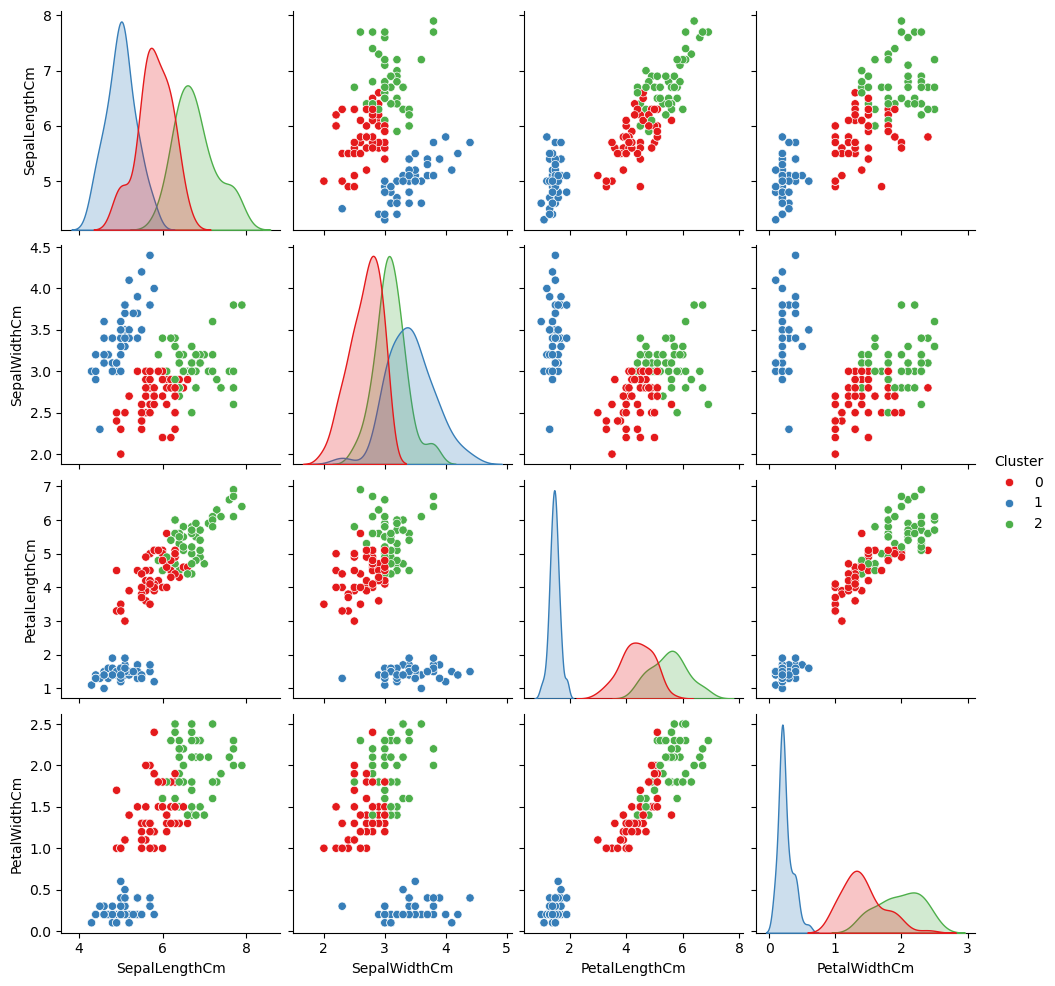

In [42]:
sns.pairplot(data, hue='Cluster', palette='Set1')
plt.show()

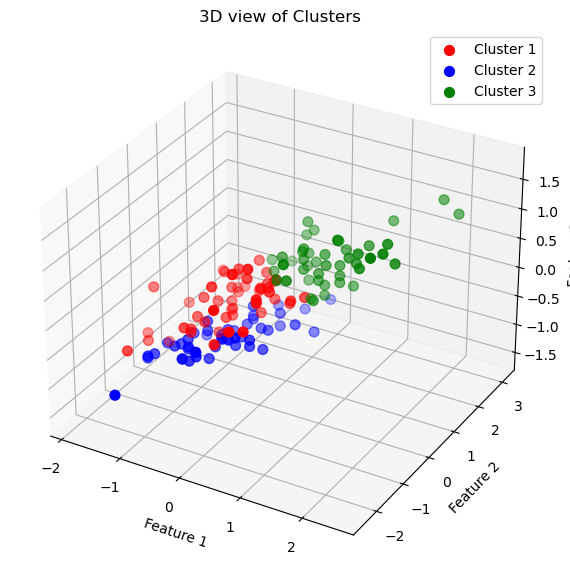

In [43]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
ax.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax.set_title('3D view of Clusters')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()
